### CNN Model for cats vs dogs classification using Data augmentation and dropout before dense layers

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [6]:
#generating batches of images from the directories and converting to integers
train_dir = r'C:\Users\v-nitbal\Documents\DL with Python - Francois Chollet\CNN for computer vision\cats_and_dogs_small\train'
val_dir = r'C:\Users\v-nitbal\Documents\DL with Python - Francois Chollet\CNN for computer vision\cats_and_dogs_small\validation'
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                  shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='binary')
val_generator = test_datagen.flow_from_directory(val_dir, target_size=(150,150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=val_generator, 
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 926s 9s/step - loss: 1.1397 - acc: 0.5228 - val_loss: 1.1648 - val_acc: 0.5032
Epoch 2/100
100/100 [==============================] - 874s 9s/step - loss: 1.3557 - acc: 0.5025 - val_loss: 0.7094 - val_acc: 0.5213
Epoch 3/100
100/100 [==============================] - 868s 9s/step - loss: 1.0642 - acc: 0.5059 - val_loss: 0.7085 - val_acc: 0.5019
Epoch 4/100
100/100 [==============================] - 940s 9s/step - loss: 0.8208 - acc: 0.4978 - val_loss: 0.6932 - val_acc: 0.4865
Epoch 5/100
100/100 [==============================] - 927s 9s/step - loss: 0.9241 - acc: 0.5122 - val_loss: 0.6931 - val_acc: 0.5165
Epoch 6/100
100/100 [==============================] - 953s 10s/step - loss: 0.9545 - acc: 0.5181 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/100
100/100 [==============================] - 940s 9s/step - loss: 1.2139 - acc: 0.5116 - val_loss: 0.6932 - val_acc: 0.4930
Epoch 8/100
100/100 [==============================] - 1044s 

100/100 [==============================] - 486s 5s/step - loss: 1.2457 - acc: 0.5022 - val_loss: 0.6931 - val_acc: 0.5058
Epoch 62/100
100/100 [==============================] - 441s 4s/step - loss: 1.3549 - acc: 0.5112 - val_loss: 0.6933 - val_acc: 0.4943
Epoch 63/100
100/100 [==============================] - 439s 4s/step - loss: 1.0851 - acc: 0.4950 - val_loss: 0.6932 - val_acc: 0.5013
Epoch 64/100
100/100 [==============================] - 446s 4s/step - loss: 0.9979 - acc: 0.5059 - val_loss: 0.6932 - val_acc: 0.5013
Epoch 65/100
100/100 [==============================] - 448s 4s/step - loss: 1.0473 - acc: 0.5047 - val_loss: 0.6932 - val_acc: 0.4987
Epoch 66/100
100/100 [==============================] - 444s 4s/step - loss: 1.0882 - acc: 0.5037 - val_loss: 0.6932 - val_acc: 0.5006
Epoch 67/100
100/100 [==============================] - 441s 4s/step - loss: 1.0084 - acc: 0.5090 - val_loss: 0.6931 - val_acc: 0.5038
Epoch 68/100
100/100 [==============================] - 448s 4s/step

In [8]:
model.save('cats_and_dogs__with_dataaugmentation.h5')

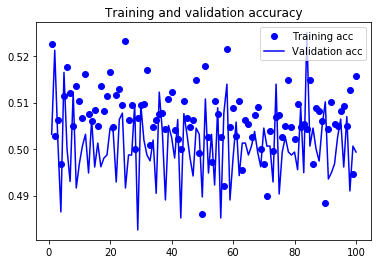

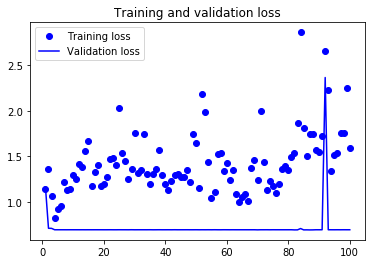

In [10]:
#visualize accuracy and loss during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()